
[Google slides here](https://docs.google.com/presentation/d/1BBJbKw-OTNJ5uPsxTvqcyhf7sD0cME3zpeiVBb2zTnw/edit?usp=sharing)

--- Paths ---
-------------

# Inter-square

Within a single cuddler, there are 28 distinct paths through the squares. They are labeled 0 on the right edge, counterclockwise to 7 in the lower right corner. (no directionality)

Down to rotations and mirror images, these INTER-square edges are:
- diagonals (2)
- h and v bars (2)
- corner to far edge (8) "hook"
- edge-to-adjacent-edge (4) "corner"
- corner to adjacent edge (8) "point", "needle"
- corner-to-adjacent-corner (4) "pyramid"

Model the puzzle as a square grid of nodes. I want three disjoint (by edge) paths that travel through every node in the middle, allowing for traveling on nodes along the edge.



In [2]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np

class cuddlegrid:
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
        self.nodes = np.arange((rows+1)*(cols+1))
        

In [157]:
squares = np.arange(25).reshape(5,5)

V = np.stack(
    [
        squares[:-1],
        squares[1:]
    ],
    2
).reshape(-1,2).tolist()

H = np.stack(
    [
        squares[:,:-1],
        squares[:,1:]
    ],
    2
).reshape(-1,2).tolist()

D1 = np.stack(
    [
        squares[:-1,:-1],
        squares[1:,1:]
    ],
    2
).reshape(-1,2).tolist()

D2 = np.stack(
    [
        squares[:-1, 1:],
        squares[1:, :-1]
    ],
    2
).reshape(-1,2).tolist()

EC_L = [
    [0,5],
    [5,10],
    [10,15],
    [15,20]
]

EC_R = [
    [4,9],
    [9,14],
    [14,19],
    [19,24]
]

EC_U = [
    [0,1],
    [1,2],
    [2,3],
    [3,4]
]

EC_D = [
    [20, 21],
    [21, 22],
    [22, 23],
    [23, 24]
]

EE_L = [
    [0,5],
    [15,20]
]
EE_R = [
    [4,9],
    [19,24]
]
EE_D = [
    [20, 21],
    [23, 24]
]
EE_U = [
    [0,1],
    [3,4]
]

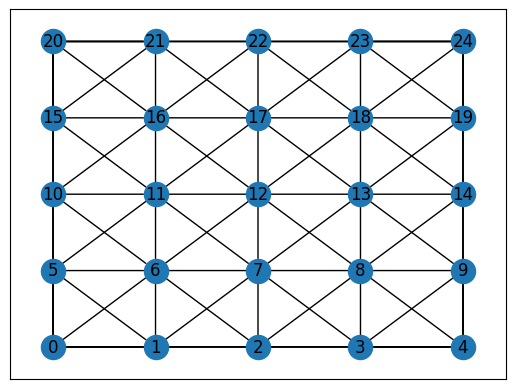

In [158]:
comparisons = [
 'D1',
 'D2',
 'EC_D',
 'EC_L',
 'EC_R',
 'EC_U',
 'EE_D',
 'EE_L',
 'EE_R',
 'EE_U',
 'H',
 'V'
]

edges = eval(" + ".join(comparisons))

#create single-edged graph
g = nx.from_edgelist(edges)#, create_using = nx.MultiGraph)
#make it a multigraph to add parallel edges
g = nx.from_edgelist(g.edges, create_using = nx.MultiGraph)
#get and add parallel edges, with instructions for drawing
for edge in edges:
    counter = 0
    for edge2 in edges:
        if edge2 == edge or edge2.reverse() == edge:
            counter += 1
            # print(f"comparing {edge} to {edge2}")
            # print(f"counter now {counter}")
    if counter > 1:
        # print(f"adding {edge}")
        g.add_edge(edge[0],edge[1], connectionstyle="arc3,rad=0.4")
        # print(f"added {edge}")
        
nx.draw_networkx(g, pos = poss)



In [159]:
g.edges

MultiEdgeView([(0, 6, 0), (0, 5, 0), (0, 5, 1), (0, 5, 2), (0, 5, 3), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (6, 12, 0), (6, 2, 0), (6, 10, 0), (6, 5, 0), (6, 7, 0), (6, 1, 0), (6, 11, 0), (5, 1, 0), (5, 11, 0), (5, 10, 0), (5, 10, 1), (5, 10, 2), (1, 7, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2), (12, 7, 0), (12, 8, 0), (12, 11, 0), (12, 18, 0), (12, 16, 0), (12, 13, 0), (12, 17, 0), (2, 7, 0), (2, 8, 0), (2, 3, 0), (2, 3, 1), (2, 3, 2), (10, 11, 0), (10, 16, 0), (10, 15, 0), (10, 15, 1), (10, 15, 2), (7, 13, 0), (7, 3, 0), (7, 11, 0), (7, 8, 0), (11, 17, 0), (11, 15, 0), (11, 16, 0), (13, 8, 0), (13, 9, 0), (13, 19, 0), (13, 17, 0), (13, 14, 0), (13, 18, 0), (3, 8, 0), (3, 9, 0), (3, 4, 0), (3, 4, 1), (3, 4, 2), (3, 4, 3), (8, 14, 0), (8, 4, 0), (8, 9, 0), (14, 9, 0), (14, 9, 1), (14, 9, 2), (14, 18, 0), (14, 19, 0), (14, 19, 1), (14, 19, 2), (4, 9, 0), (4, 9, 1), (4, 9, 2), (4, 9, 3), (17, 16, 0), (17, 23, 0), (17, 21, 0), (17, 18, 0), (17, 22, 0), (15, 16, 0), (15, 21, 0), (15, 20, 0

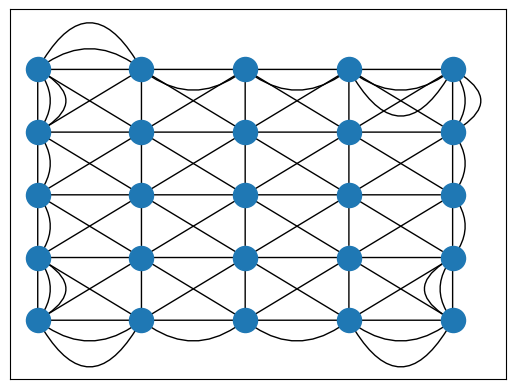

In [160]:
# parallel edges are overlapping. Draw the nodes and the "grid" edges, then the "edge" edges curved.

g = nx.from_edgelist(edges, create_using = nx.MultiGraph)

grid_edges = [
    edge
    for edge in list(g.edges)
    if edge[2] == 0
]
ec_edges = [
    edge
    for edge in list(g.edges)
    if edge[2] == 1
]
ee_edges = [
    edge
    for edge in list(g.edges)
    if edge[2] == 2
]

nx.draw_networkx_nodes(g, pos = poss)

# g_grid = nx.from_edgelist(grid_edges)
# g_ee = nx.from_edgelist(ee_edges)
# g_ec = nx.from_edgelist(ec_edges)

for edge in g.edges(keys = True):
    edge_key = edge[2]
    if edge_key == 0:
        nx.draw_networkx_edges(g, edgelist=[edge], pos = poss)
    elif edge_key == 1:
        nx.draw_networkx_edges(g, edgelist=[edge], pos = poss, connectionstyle="arc3,rad=0.4")
    elif edge_key == 2:
        nx.draw_networkx_edges(g, edgelist=[edge], pos = poss, connectionstyle="arc3,rad=0.9")
    else:
        raise(ValueError)

plt.show()



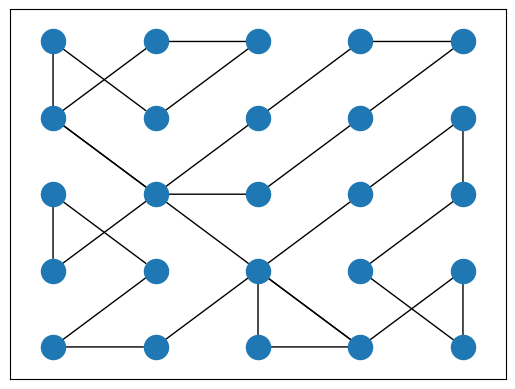

In [169]:
# traveling salesman problem with Christofides algorithm
path1 = nx.approximation.traveling_salesman_problem(g)
p1_edgelist = list(zip(path1, path1[1:]))

nx.draw_networkx_edges(g, edgelist = p1_edgelist, pos = poss);
nx.draw_networkx_nodes(g, pos=poss)

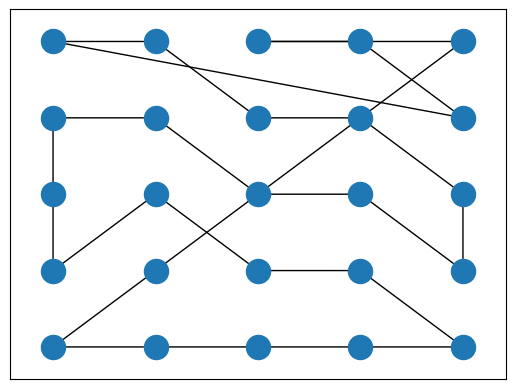

In [175]:
# traveling salesman problem with simulated annealing

# tsp_methods = {
#     "christofides":nx.approximation.christofides,
#      "greedy":nx.approximation.greedy_tsp,
#      "simulated_annealing_tsp":nx.approximation.simulated_annealing_tsp,
#      "threshold":nx.approximation.threshold_accepting_tsp,
#      "asadpour_atsp":nx.approximation.asadpour_atsp
# }

# method = tsp_methods['simulated_annealing_tsp']

###################################################################################
#### ChatGPT ###############################################
############################################################


def make_complete_weighted_graph(g, penalty_weight=1e6):
    # Get list of nodes
    nodes = list(g.nodes)

    # Start with an empty complete graph
    complete = nx.complete_graph(nodes)

    # Add weights from original graph if edge exists
    for u in nodes:
        for v in nodes:
            if u == v:
                continue
            if g.has_edge(u, v):
                # Use minimum weight among parallel edges (for MultiGraph)
                min_weight = min(
                    data.get('weight', 1)
                    for key, data in g.get_edge_data(u, v).items()
                ) if isinstance(g, nx.MultiGraph) else g[u][v].get('weight', 1)
                complete[u][v]['weight'] = min_weight
            else:
                # Assign penalty weight
                complete[u][v]['weight'] = penalty_weight
    return complete
#####################################################################################

complete = make_complete_weighted_graph(g)

path2 = nx.approximation.greedy_tsp(complete)
p2_edgelist = list(zip(path2, path2[1:]))

nx.draw_networkx_edges(g, edgelist = p2_edgelist, pos = poss);
nx.draw_networkx_nodes(g, pos=poss)

In [179]:
#another iteration!

p3_edgelist = nx.approximation.simulated_annealing_tsp(g, p2_edgelist)

nx.draw_networkx_edges(g, edgelist = p3_edgelist, pos = poss);
nx.draw_networkx_nodes(g, pos=poss)

NetworkXError: init_cycle must be a cycle. (return to start)

# Demo puzzle

Made a single instance of a puzzle by hand in google slides.

![Maulbetsch Special](./MS-solution.png)

I believe this works --- now to confirm by encoding it as a path.

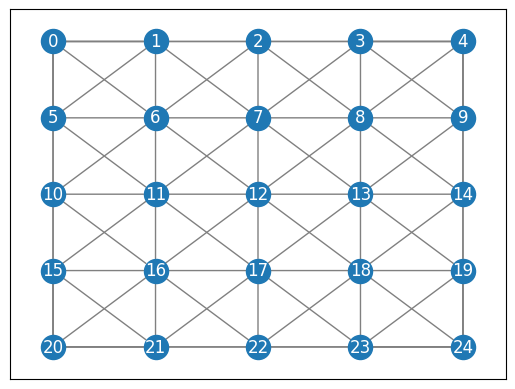

In [191]:
# draw the graph of cuddlers with numeric labels.
nx.draw_networkx(g, pos = np.array([1,-1])*poss, with_labels=True, edge_color = 'gray', font_color = 'white')

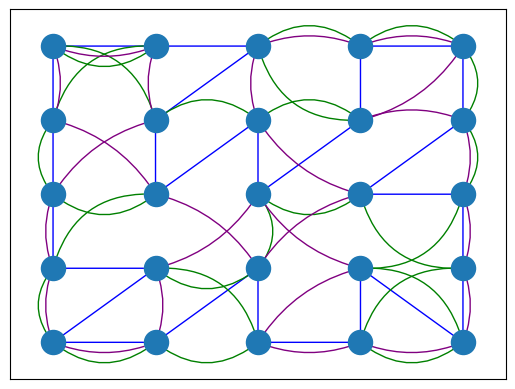

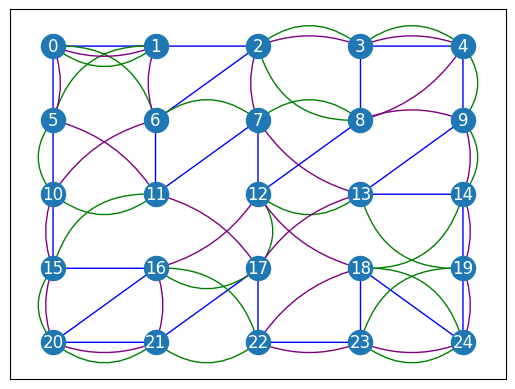

In [260]:
#copy down each colored path

ms_blue = [0, 1, 2, 6, 11, 7, 12, 8, 3, 4, 9, 13, 14, 19, 24, 18, 23, 22, 17, 21, 20, 16, 15, 10, 5, 0]
ms_purple = [0, 1, 6, 10, 15, 20, 21, 16, 12, 18, 22, 23, 24, 19, 14, 9, 8, 4, 3, 2, 7, 13, 17, 11, 5, 0]
ms_green =[0, 1, 5, 10, 11, 15, 20, 21, 22, 16, 17, 12, 13, 19, 23, 24, 18, 14, 9, 4, 3, 2, 8, 7, 6, 0]

g_positions = np.array([1,-1])*poss

def edges_from_path(edge_list):
    return list(zip(edge_list, edge_list[1:]))

b_path = edges_from_path(ms_blue)
p_path = edges_from_path(ms_purple)
g_path = edges_from_path(ms_green)

# draw the graph with the appropriate colored edges
nx.draw_networkx_nodes(g, pos = g_positions)
nx.draw_networkx_edges(g, pos = g_positions, edgelist = b_path, edge_color = 'blue');
nx.draw_networkx_edges(g, pos = g_positions, edgelist = g_path, edge_color = 'green', connectionstyle="arc3,rad=0.4");
nx.draw_networkx_edges(g, pos = g_positions, edgelist = p_path, edge_color = 'purple', connectionstyle="arc3,rad=0.2");
plt.show()


nx.draw_networkx_nodes(g, pos = g_positions)
nx.draw_networkx_edges(g, pos = g_positions, edgelist = b_path, edge_color = 'blue');
nx.draw_networkx_edges(g, pos = g_positions, edgelist = g_path, edge_color = 'green', connectionstyle="arc3,rad=0.4");
nx.draw_networkx_edges(g, pos = g_positions, edgelist = p_path, edge_color = 'purple', connectionstyle="arc3,rad=0.2");
nx.draw_networkx_labels(g, pos = g_positions, font_color = 'white')
plt.show()

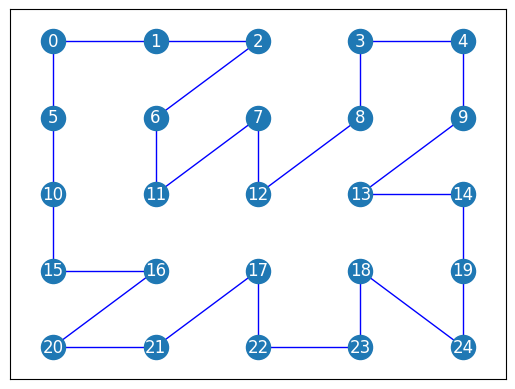

In [261]:
gb = nx.from_edgelist(b_path)
fig = plt.subplots()
nx.draw_networkx(gb, pos = g_positions, edge_color = 'blue', font_color = 'white')#pos = nx.spring_layout(g))

In [262]:
#is the blue path isomorphic to cycle 25?

cycle25 = nx.cycle_graph(25)

nx.is_isomorphic(cycle25, gp)

True

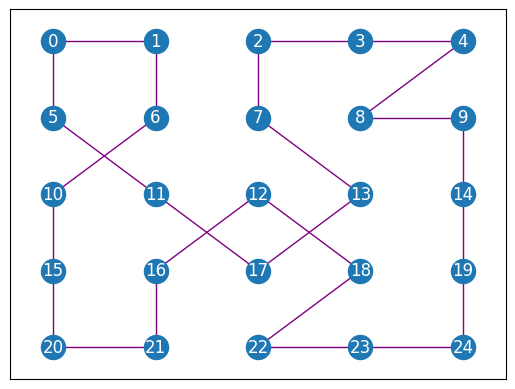

True

In [263]:
#is the purple path?

gp = nx.from_edgelist(p_path)
fig = plt.subplots()
nx.draw_networkx(gp, pos = g_positions, font_color = 'white', edge_color = 'purple')
plt.show()

nx.is_isomorphic(gp, cycle25)

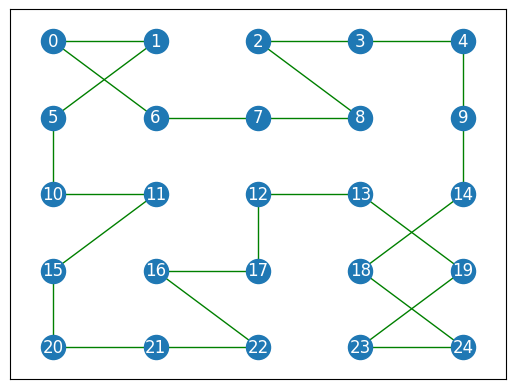

True

In [264]:
#and finally, is the green path? This is the one with the double node.

gg = nx.from_edgelist(g_path)
fig = plt.subplots()
nx.draw_networkx(gg, pos = g_positions, font_color = 'white', edge_color = 'green')
plt.show()

nx.is_isomorphic(gg, cycle25)

In [265]:
# Great! We have the paths in terms of the order of cuddlers. These need to be translated into colors assigned to
# particular squares on each cuddler.

#For now, I'll manually write them. It will be a little time, but I can do it!
#Parallel edges can be rearranged without losing connectivity (example: swapping green
#and purple on the same outward side of corners doesn't change anything.
#this might make it look better --- but don't worry about it for now.

#is this the 

b_path[:3], g_path[:3], p_path[:3]

([(0, 1), (1, 2), (2, 6)],
 [(0, 1), (1, 5), (5, 10)],
 [(0, 1), (1, 6), (6, 10)])

In [281]:
b_squares_raw = (0,6,4,0,4,5,1,6,2,1,5,6,2,1,5,2,6,0,4,6,2,5,1,0,4,6,2,6,2,3,7,6,2,4,0,2,6,5,1,4,0,1,5,4,0,2,6,2,6,2)
p_squares_raw = (6,0,4,6, 2,5,1,6,2,6,2,0,4,2, 6,1, 5,7, 3,5, 1,0, 4,0, 4,2, 6,2, 6,2, 6,4, 0,1, 5,4, 4,0, 0,6,2,7,3,5,1,3,7,3,7,2)
g_squares_raw = (7,0,4,5,1,6,2,0,4,5,1,6,2,0,4,0,4,3,7,0,4,2,6,0,4,7,3,5,1,0,4,3,7,1,5,2,6,2,6,4,4,0,0,7,3,4,4,0,0,3)

def unraw(squares):
    #change to an np array of intra-cuddlefish square pairs for a single color
    return np.array(squares).reshape(-1,2)

b_squares = unraw(b_squares_raw)
p_squares = unraw(p_squares_raw)
g_squares = unraw(g_squares_raw)

paths_by_square = {
    "blue":dict(
        zip(
            ms_blue,
            b_squares.tolist()
        )
    ),
    "purple":dict(
        zip(
            ms_purple,
            p_squares.tolist()
        )
    ),
    "green":dict(
        zip(
            ms_green,
            g_squares.tolist()
        )
    ),
}

paths_by_square


{'blue': {0: [0, 6],
  1: [4, 0],
  2: [4, 5],
  6: [1, 6],
  11: [2, 1],
  7: [5, 6],
  12: [2, 1],
  8: [5, 2],
  3: [6, 0],
  4: [4, 6],
  9: [2, 5],
  13: [1, 0],
  14: [4, 6],
  19: [2, 6],
  24: [2, 3],
  18: [7, 6],
  23: [2, 4],
  22: [0, 2],
  17: [6, 5],
  21: [1, 4],
  20: [0, 1],
  16: [5, 4],
  15: [0, 2],
  10: [6, 2],
  5: [6, 2]},
 'purple': {0: [6, 0],
  1: [4, 6],
  6: [2, 5],
  10: [1, 6],
  15: [2, 6],
  20: [2, 0],
  21: [4, 2],
  16: [6, 1],
  12: [5, 7],
  18: [3, 5],
  22: [1, 0],
  23: [4, 0],
  24: [4, 2],
  19: [6, 2],
  14: [6, 2],
  9: [6, 4],
  8: [0, 1],
  4: [5, 4],
  3: [4, 0],
  2: [0, 6],
  7: [2, 7],
  13: [3, 5],
  17: [1, 3],
  11: [7, 3],
  5: [7, 2]},
 'green': {0: [7, 0],
  1: [4, 5],
  5: [1, 6],
  10: [2, 0],
  11: [4, 5],
  15: [1, 6],
  20: [2, 0],
  21: [4, 0],
  22: [4, 3],
  16: [7, 0],
  17: [4, 2],
  12: [6, 0],
  13: [4, 7],
  19: [3, 5],
  23: [1, 0],
  24: [4, 3],
  18: [7, 1],
  14: [5, 2],
  9: [6, 2],
  4: [6, 4],
  3: [4, 0],
  2

In [ ]:
# paths_by_square is the instruction to fill each square in each cuddler with a given color.
# paths_by_square[color][cuddler_no] gives the squares from 0 to 7 in the cuddler with that given color.
# ex. paths_by_square['blue'][5] == [6,2] says the bottom (6) and top (2) squares of cuddler 5 are blue.

# Swapping for overlapping edges
All of the parallel edges are given the same pair of squares. These need to be moved out of the way for the cuddlefish to be appropriately colored.

Swap plan: Change squares Y,Z on cuddler X to color C by:
C:
X:[Y,Z]
according to the following.

Swap plan
P:
0:[5,1],
1:[3,6],
10:[1,5],
15:[3,5],
20:[3,6],
21:[5,2],
22:[7,1],
23:[0,5],
24:[4,1],
19:[7,1],
14:[7,2],
4:[5,3],
3:[1,4],
5:[7,3]

Swap plan
G:
0:[2,7],
1:[2,5],
5:[1,5],
10:[3,0],
15:[1,5],
20:[3,6],
21:[0,6],
24:[3,6],
23:[6,1],
14:[1,5],
9:[1,7],
4:[7,2],
3:[2,3],
2:[2,7],


Swap plan
B: none